<h1> DATA ANALYSIS with PYTHON</h1>

In [9]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('automobile2.csv', header=0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110,5500.0,12.368421,9.400000,15250.0,Low,0,1,1,0


<h2> Analyzing Individual Feature Patterns Using Visualization </h2>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<h3>1. Data type</h3>

In [13]:
print(df[['bore','stroke','compression-ratio','horsepower']].dtypes)

bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
dtype: object


<h3>2. Correlation</h3>

In [14]:
print(df[['bore','stroke','compression-ratio','horsepower']].corr())

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.051087           0.002034    0.566807
stroke            -0.051087  1.000000           0.186780    0.100881
compression-ratio  0.002034  0.186780           1.000000   -0.214260
horsepower         0.566807  0.100881          -0.214260    1.000000


<h3>3. Positive Linear Relationship (plot)</h3>

(0.0, 53281.439038124794)

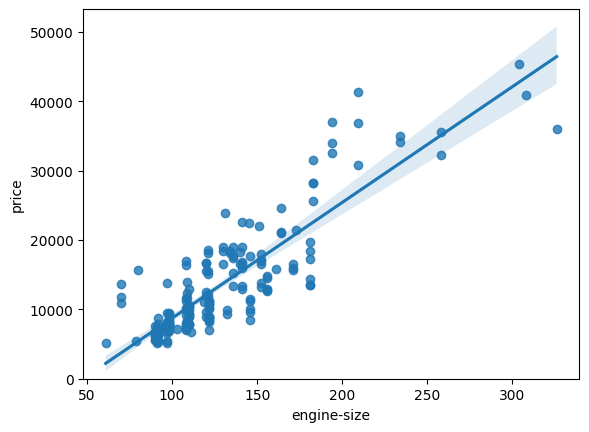

In [15]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [17]:
#engine-size & price correlation
print(df[['engine-size','price']].corr())

             engine-size     price
engine-size     1.000000  0.872337
price           0.872337  1.000000


(0.0, 47711.639621553455)

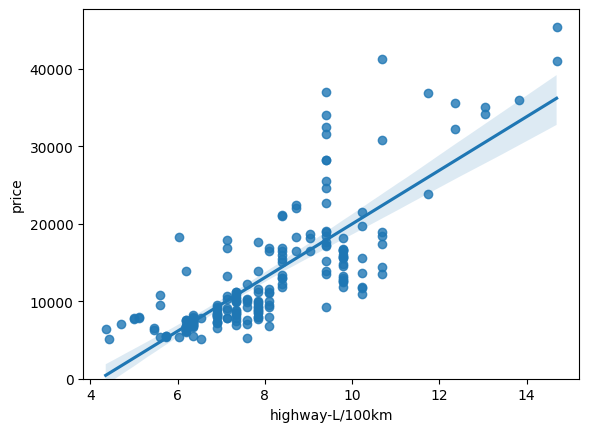

In [22]:
#highway >>> price
sns.regplot(x='highway-L/100km', y='price', data=df)
plt.ylim(0,)

In [23]:
#highway X price correlation
print(df[['highway-L/100km','price']].corr())

                 highway-L/100km     price
highway-L/100km         1.000000  0.801313
price                   0.801313  1.000000


In [24]:
print(df.corr())

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.469772   -0.529145 -0.364511   
normalized-losses   0.469772           1.000000   -0.057068  0.019433   
wheel-base         -0.529145          -0.057068    1.000000  0.879005   
length             -0.364511           0.019433    0.879005  1.000000   
width              -0.237262           0.086961    0.814593  0.857271   
height             -0.542261          -0.377664    0.583789  0.492955   
curb-weight        -0.234743           0.099404    0.787584  0.881058   
engine-size        -0.112069           0.112362    0.576779  0.685531   
bore               -0.145790          -0.029929    0.501576  0.610847   
stroke              0.008072           0.055673    0.144733  0.120929   
compression-ratio  -0.181073          -0.114738    0.249689  0.159203   
horsepower          0.074617           0.217322    0.375610  0.580583   
peak-rpm            0.284033           0.239580   -

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10748\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<h3>4. Weak Linear Relationship </h3>

<Axes: xlabel='peak-rpm', ylabel='price'>

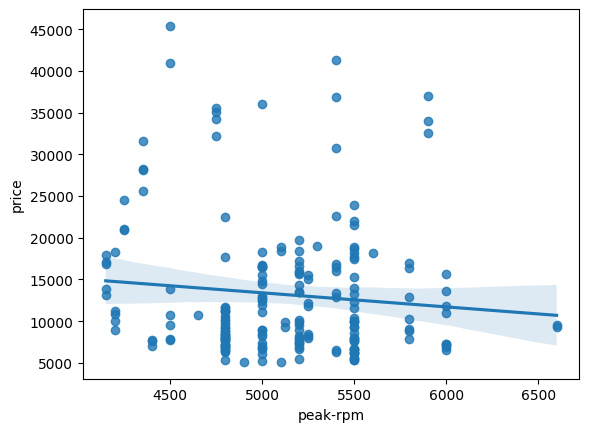

In [31]:
#Peak-rpm X Price

sns.regplot(x="peak-rpm", y="price", data=df)

In [26]:
#CORRELATION
print(df[['peak-rpm','price']].corr())

          peak-rpm     price
peak-rpm  1.000000 -0.101593
price    -0.101593  1.000000


<Axes: xlabel='stroke', ylabel='price'>

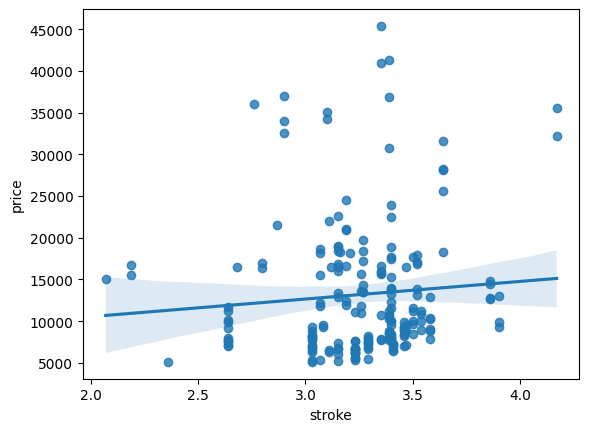

In [32]:
#Stroke X Price
sns.regplot(x='stroke', y='price', data=df)


In [33]:
#Correlation
print(df[['stroke','price']].corr())

          stroke     price
stroke  1.000000  0.083298
price   0.083298  1.000000


<h3>5. Categorical Variables</h3>

<Axes: xlabel='body-style', ylabel='price'>

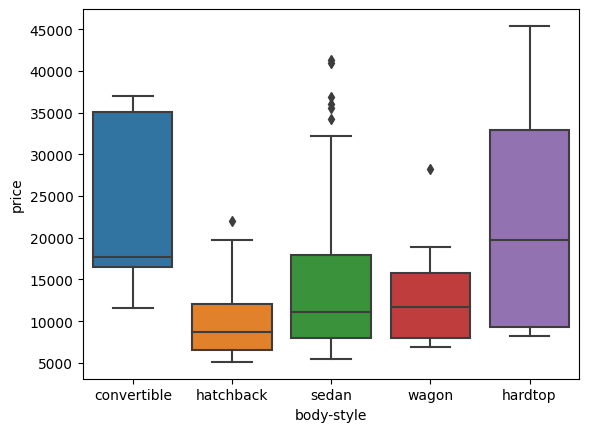

In [35]:
#visualize categorical variables >>> sns.boxplot
#Body Style X Price
sns.boxplot(x='body-style', y='price', data=df)

<Axes: xlabel='engine-location', ylabel='price'>

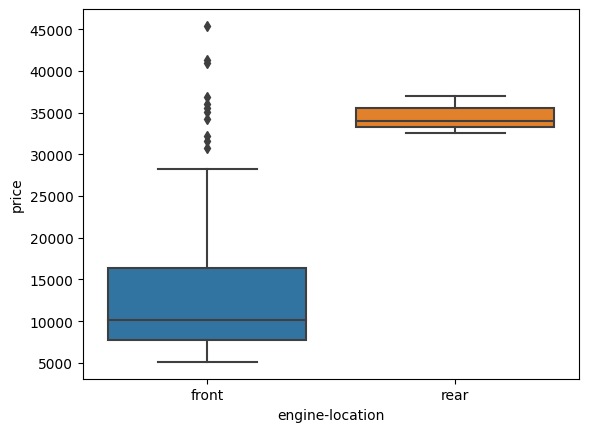

In [36]:
#Engine Location X Price
sns.boxplot(x='engine-location', y='price', data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

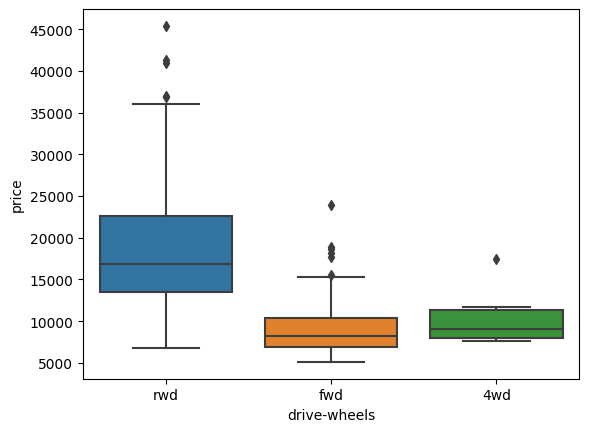

In [38]:
#Drive wheels X Price
sns.boxplot(x='drive-wheels', y='price', data=df)

<h3>6. Descriptive Statistical Analysis</h3>

In [39]:
#Default describe
#skips variable of type object
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.259816,10.170100,103.365000,5118.259901,9.937914,8.041663,13205.690000,0.100000,0.900000,0.820000,0.180000
std,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,4.014163,37.455525,479.240743,2.539415,1.844764,7966.982558,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,9.791667,7.833333,10270.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.750000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Describe object data type
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


<h3>7. Value Counts</h3>